In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error, explained_variance_score

In [2]:
df_train = pd.read_excel(r"D:\Self_Learning\Mysql\data\Sales Data Analystic\first_half_data.xlsx", parse_dates=["Order_Date"])
df_train.dropna(inplace=True)  #remove null

In [3]:
# Define features (X) and target (y)
features = ["Quantity_Ordered", "Price_Each", "Month"]
X_train_data = df_train[features]
y_train_data = df_train["Sales"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_train_data, y_train_data, test_size=1/3, random_state=89)

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
accuracy_test = r2_score(y_test, y_test_pred)

print(f"✅ Model trained successfully on first 6-month data!")
print(f"🔹 Accuracy on test data (R² Score): {accuracy_test:.2f}")

✅ Model trained successfully on first 6-month data!
🔹 Accuracy on test data (R² Score): 0.86


C:\Users\balac\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


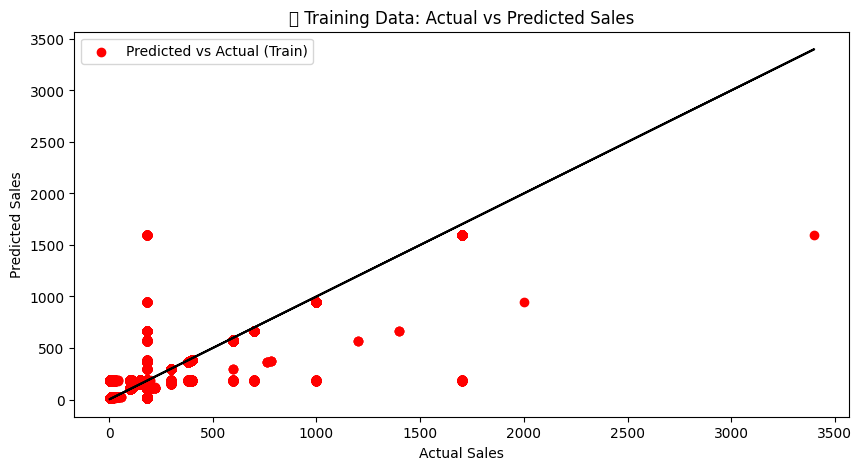

In [7]:
#  first 6 month datas
plt.figure(figsize=(10,5))
plt.scatter(y_train, y_train_pred, color="red", label="Predicted vs Actual (Train)")
plt.plot(y_train, y_train, color="black")  # Ideal Fit Line
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("🔹 Training Data: Actual vs Predicted Sales")
plt.legend()
plt.show()

In [8]:
# 6 month Model Performance Metrics
print("\n🔹 Model Performance on Test Data:")
print("✅ Mean Absolute Error (MAE) = ", round(mean_absolute_error(y_test, y_test_pred), 2))
print("✅ Mean Squared Error (MSE) = ", round(mean_squared_error(y_test, y_test_pred), 2))
print("✅ Median Absolute Error = ", round(median_absolute_error(y_test, y_test_pred), 2))
print("✅ Explained Variance Score = ", round(explained_variance_score(y_test, y_test_pred), 2))
print("✅ R2 Score = ", round(r2_score(y_test, y_test_pred), 2))


🔹 Model Performance on Test Data:
✅ Mean Absolute Error (MAE) =  40.81
✅ Mean Squared Error (MSE) =  14544.73
✅ Median Absolute Error =  12.5
✅ Explained Variance Score =  0.86
✅ R2 Score =  0.86


In [9]:
# Load the next 6-month data
df_validate = pd.read_excel(r'D:\Self_Learning\Mysql\data\Sales Data Analystic\second_half_data.xlsx')  # Update path
df_validate.dropna(inplace=True)

In [10]:
X_validate = df_validate[features]
y_validate = df_validate["Sales"]

In [11]:
y_pred_validate = model.predict(X_validate)

In [12]:
accuracy_validate = r2_score(y_validate, y_pred_validate)
print(f"\n✅ Model validated on next 6-month data!")
print(f"🔹 Accuracy on validation data (R² Score): {accuracy_validate:.4f}")


✅ Model validated on next 6-month data!
🔹 Accuracy on validation data (R² Score): 0.8595


C:\Users\balac\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


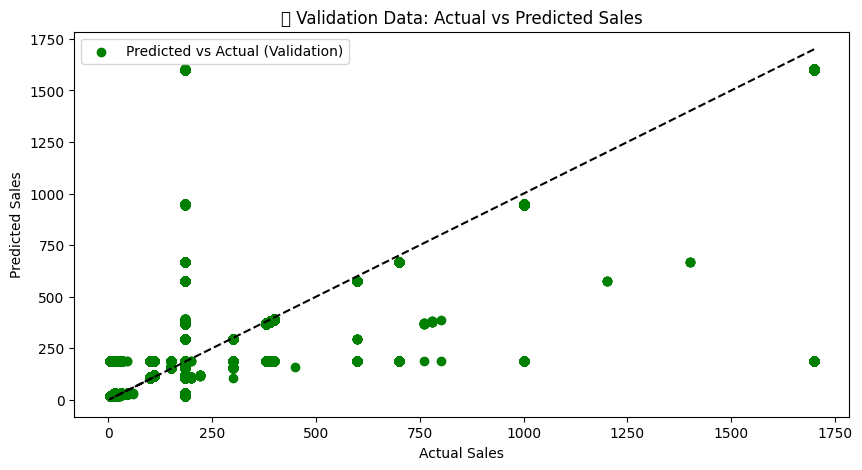

In [13]:
plt.figure(figsize=(10,5))
plt.scatter(y_validate, y_pred_validate, color="green", label="Predicted vs Actual (Validation)")
plt.plot(y_validate, y_validate, color="black", linestyle="--")  # Ideal Fit Line
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("🔹 Validation Data: Actual vs Predicted Sales")
plt.legend()
plt.show()

In [14]:
print("\n🔹 Model Performance on Validation Data:")
print("✅ Mean Absolute Error (MAE) = ", round(mean_absolute_error(y_validate, y_pred_validate), 2))
print("✅ Mean Squared Error (MSE) = ", round(mean_squared_error(y_validate, y_pred_validate), 2))
print("✅ Median Absolute Error = ", round(median_absolute_error(y_validate, y_pred_validate), 2))
print("✅ Explained Variance Score = ", round(explained_variance_score(y_validate, y_pred_validate), 2))
print("✅ R2 Score = ", round(r2_score(y_validate, y_pred_validate), 2))


🔹 Model Performance on Validation Data:
✅ Mean Absolute Error (MAE) =  41.92
✅ Mean Squared Error (MSE) =  14334.8
✅ Median Absolute Error =  14.89
✅ Explained Variance Score =  0.86
✅ R2 Score =  0.86


# Forecasting In Salcs Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [3]:
# Load dataset
file_path = r"D:\Self_Learning\Data Analysics Projects\Sales Data Analystic\cleaned_data.csv"  # Update path if necessary
df = pd.read_csv(file_path)

In [4]:
# Convert Order_Date to datetime
df["Order_Date"] = pd.to_datetime(df["Order_Date"])

In [5]:
# Aggregate monthly sales
df["Year-Month"] = df["Order_Date"].dt.to_period("M")
monthly_sales = df.groupby("Year-Month")["Sales"].sum().reset_index()

# Convert to datetime for modeling
monthly_sales["Year-Month"] = monthly_sales["Year-Month"].astype(str)
monthly_sales["Year-Month"] = pd.to_datetime(monthly_sales["Year-Month"])

In [6]:
# Fit ARIMA Model
model = ARIMA(monthly_sales["Sales"], order=(2, 1, 2))  # ARIMA(p=2, d=1, q=2)
model_fit = model.fit()

c:\Users\balac\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\balac\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\balac\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [7]:
# Forecast next 12 months
forecast_steps = 12
future_dates = pd.date_range(start=monthly_sales["Year-Month"].max(), periods=forecast_steps+1, freq="M")[1:]
forecast = model_fit.forecast(steps=forecast_steps)

# Create forecast dataframe
forecast_df = pd.DataFrame({"Year-Month": future_dates, "Forecasted_Sales": forecast})

C:\Users\balac\AppData\Local\Temp\ipykernel_15844\3698263210.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=monthly_sales["Year-Month"].max(), periods=forecast_steps+1, freq="M")[1:]


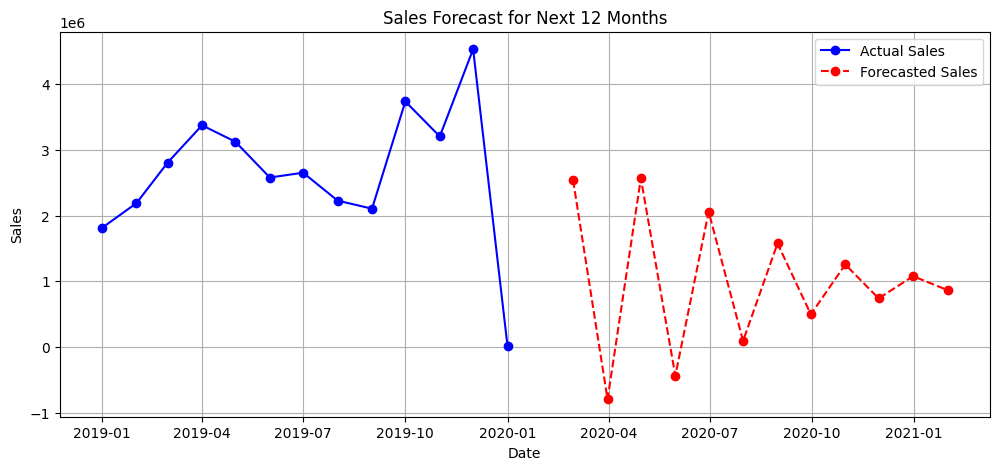

In [8]:
# Plot actual vs forecasted sales
plt.figure(figsize=(12, 5))
plt.plot(monthly_sales["Year-Month"], monthly_sales["Sales"], marker="o", linestyle="-", color="blue", label="Actual Sales")
plt.plot(forecast_df["Year-Month"], forecast_df["Forecasted_Sales"], marker="o", linestyle="--", color="red", label="Forecasted Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Forecast for Next 12 Months")
plt.legend()
plt.grid()
plt.show()

In [9]:
# Save forecast results
forecast_df.to_csv("sales_forecast.csv", index=False)
print("Forecast saved as 'sales_forecast.csv'")

Forecast saved as 'sales_forecast.csv'
